# Sign Language MNIST 

The Sign Language MNIST dataset builds on the original MNIST dataset's format, providing a more challenging, real-world application for image-based machine learning by focusing on American Sign Language (ASL) letters. This dataset presents a multi-class classification problem with 24 classes (letters A-Z, excluding J and Z due to their motion requirement), with images resized and modified to increase variation using filters, pixelation, brightness adjustments, and slight rotations. Designed to challenge modern algorithms like Convolutional Neural Networks, it supports potential applications in real-time sign language translation. This could aid communication for the deaf and hard-of-hearing, possibly deployable on affordable devices like Raspberry Pi for practical, accessible use.

## Transfer Learning - MobileNetV2 API 

https://keras.io/api/applications/mobilenet/

MobileNetV2 is very similar to the original MobileNet, except that it uses inverted residual blocks with bottlenecking features. It has a drastically lower parameter count than the original MobileNet. MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance (documentation).

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (128, 128, 3), classes = 24)

base_model.trainable = False

In [54]:
# building the end of the model
x  = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(units = 1024, activation = 'relu')(x)
x = Dense(units = 64, activation = 'relu')(x)
prediction = Dense(units = 24, activation = 'softmax')(x)

# group all together
model = Model(inputs = base_model.input, outputs = prediction)

In [55]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 3,636,888 (13.87 MB)

 Trainable params: 1,378,904 (5.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
generator

In [57]:
from PIL import Image
import os
import pandas as pd 
from pandas import DataFrame
import numpy as np 
import glob
import warnings
warnings.filterwarnings('ignore')


def clear_directory(directory_path: str):
    """
    Checks if the folder contains files or subfolders, and empties them
    while retaining the file itself.

    Args:
        directory_path (str): Path of the folder to empty.
    """
    for file in glob.glob(os.path.join(directory_path, '*')):
        if os.path.isfile(file):
            os.remove(file) 
        elif os.path.isdir(file):
            os.rmdir(file) 
            
            

def Preprocessing_Data(sign : DataFrame) -> DataFrame:
    
    """
    Preprocesses sign data to generate and save images, while preparing
    a final DataFrame with the image paths and their target labels.

    This function performs the following steps:
    1. Empties the 'Images_MNIST/Images_train' and 'Images_MNIST/Images_test' folders without deleting them.
    2. Loops through each row of the input DataFrame `sign` to create an image from the pixels,
    resizes the image, and saves it to the 'Images_MNIST/Images_train' folder.
    3. Generates a DataFrame containing the filenames and target labels of the images.

    Args:
    sign (DataFrame): A DataFrame containing the sign data, with the first column as the label,
    and the remaining columns representing the pixels (28x28 = 784 pixels) of each image.

    Returns:
    DataFrame: A DataFrame containing two columns:
    - 'filenames': the full paths of the images saved in 'Images_MNIST/Images_train'.
    - 'target': the labels corresponding to each image.

    Notes:
    - The function limits the processing to 10,000 images to avoid memory overloads.
    - The images are resized from 28x28 to 128x128 pixels.
    """

    clear_directory('Images_MNIST/Images_train')
    clear_directory('Images_MNIST/Images_test')
    print('Folders has been cleaned...')
    
    for idx, row in sign.iterrows():
        if idx < 10000:
            label = row.label
            pixels = row[1:].values
            pixels = pixels.reshape((28, 28))  # total of 784 pixel
            
            image = Image.fromarray(pixels.astype('uint8'), mode='L')
            image = image.resize((128, 128), Image.NEAREST)
            image.save(f'Images_MNIST/Images_train/image_{label}_{idx}.png')  
        else:
            break

    print('All images of train set have been uploaded...')

    lst_images = os.listdir('Images_MNIST/Images_train/')
    labels = []
    for element in lst_images:
        label = element.split('_')[1]
        labels.append(label)
    print('Split Succeed..')
        
    data = pd.DataFrame(lst_images, columns = ['filenames'])
    data['target'] = labels

    directory = 'Images_MNIST/Images_train'
    data['filenames'] = data.filenames.apply(lambda x : os.path.join(directory, x))
    print('The data is Ready.')
    
    return data

sign = pd.read_csv('Images_MNIST/sign_mnist_train.csv')
data = Preprocessing_Data(sign = sign)

Folders has been cleaned...
All images of train set have been uploaded...
Split Succeed..
The data is Ready.


In [58]:
train_generator = generator.flow_from_dataframe(dataframe = data, 
                              x_col = 'filenames', 
                              y_col = 'target', 
                              target_size = (128, 128), 
                              shuffle = True, 
                              batch_size = 8, 
                              subset = 'training', 
                              class_mode = 'categorical', 
                              seed = 42)

valid_generator = generator.flow_from_dataframe(dataframe = data, 
                              x_col = 'filenames', 
                              y_col = 'target', 
                              target_size = (128, 128), 
                              shuffle = True, 
                              batch_size = 8, 
                              subset = 'validation', 
                              class_mode = 'categorical', 
                              seed = 42)

Found 8000 validated image filenames belonging to 24 classes.
Found 2000 validated image filenames belonging to 24 classes.


In [59]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer = Adam(learning_rate = 0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True,
                               start_from_epoch = 0)

# réentraîne seulement les couches ajoutées 
history = model.fit(train_generator, 
          validation_data = valid_generator, 
          epochs = 10, 
          verbose = 1, 
          callbacks = [early_stopping])

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 257s 243ms/step - accuracy: 0.3600 - loss: 2.0723 - val_accuracy: 0.8955 - val_loss: 0.3490
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 224s 224ms/step - accuracy: 0.7625 - loss: 0.6971 - val_accuracy: 0.9225 - val_loss: 0.2524
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 215s 215ms/step - accuracy: 0.8424 - loss: 0.4527 - val_accuracy: 0.9580 - val_loss: 0.1593
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 220s 220ms/step - accuracy: 0.8568 - loss: 0.4102 - val_accuracy: 0.9690 - val_loss: 0.1401
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 207s 207ms/step - accuracy: 0.8893 - loss: 0.3305 - val_accuracy: 0.9810 - val_loss: 0.0917
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 207s 207ms/step - accuracy: 0.9019 - loss: 0.2843 - val_accuracy: 0.9755 - val_loss: 0.0923
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 206s 206ms/step - accuracy: 0.9042 - loss: 0.2716 - val_accuracy: 0.9880 - val_loss: 0.0618
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 208s 208ms/step - ac

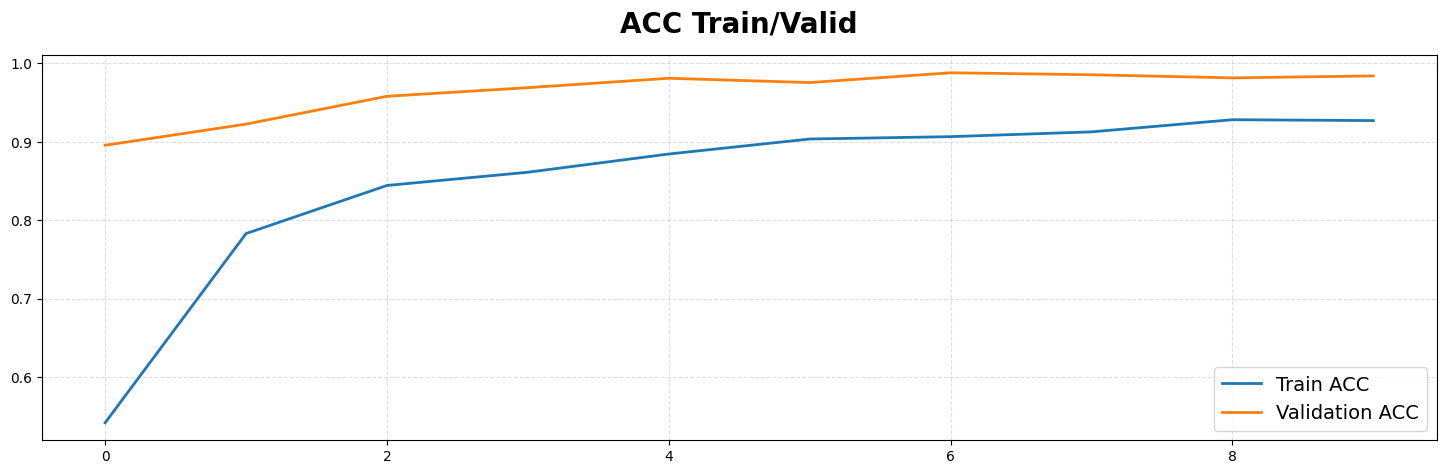

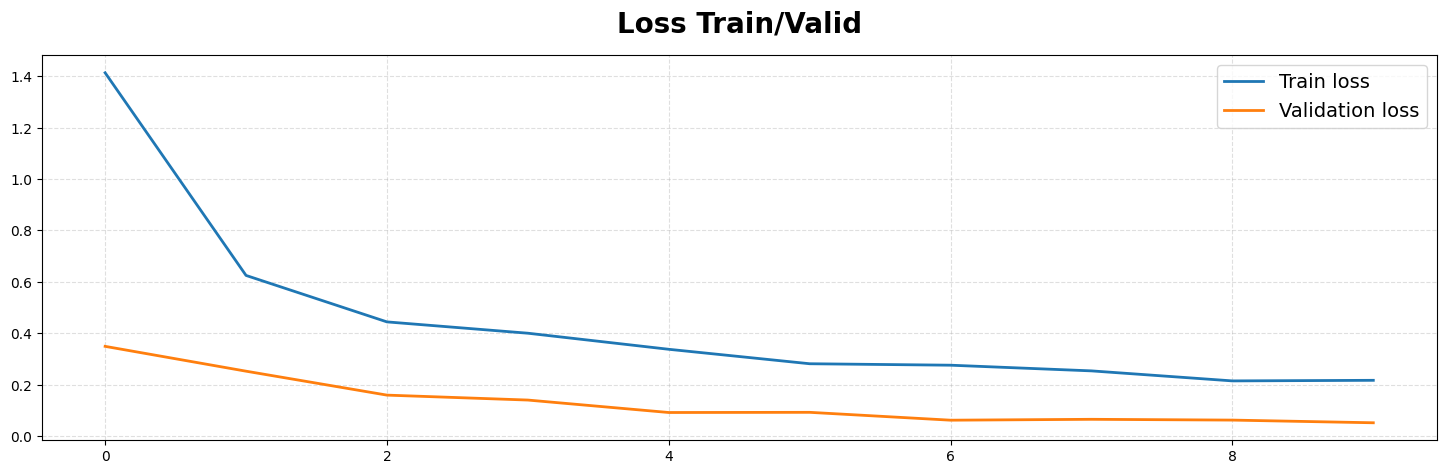

In [60]:
import matplotlib.pyplot as plt

epoch = history.epoch
train_auc = history.history['accuracy']
val_auc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (18, 5))
plt.plot(epoch, train_auc, label = 'Train ACC', lw = 2)
plt.plot(epoch, val_auc, label = 'Validation ACC', lw = 2)
plt.title('ACC Train/Valid', fontsize = 20, fontweight = 'bold', y = 1.04)
plt.legend(fontsize = 14)
plt.grid(True, ls = '--', alpha = 0.4)
plt.show()

plt.figure(figsize = (18, 5))
plt.plot(epoch, train_loss, label = 'Train loss', lw = 2)
plt.plot(epoch, val_loss, label = 'Validation loss', lw = 2)
plt.title('Loss Train/Valid', fontsize = 20, fontweight = 'bold', y = 1.04)
plt.legend(fontsize = 14)
plt.grid(True, ls = '--', alpha = 0.4)
plt.show()

# Validate Model On Test Data

In [61]:
def Preprocessing_Test(sign_test : DataFrame, directory_test : str) -> DataFrame:

    for idx, row in sign_test.iterrows():
        label = row.label
        pixels = row[1:].values
        pixels = pixels.reshape((28, 28))  # total of 784 pixel
        
        image = Image.fromarray(pixels.astype('uint8'), mode='L')
        image = image.resize((128, 128), Image.NEAREST)
        image.save(f'Images_MNIST/Images_test/image_{label}_{idx}.png')  

    print('All images of test set have been uploaded')
    
    data_test = pd.DataFrame(os.listdir(directory_test), columns=['filenames'])
    data_test['target'] = [int(element.split('_')[1]) for element in data_test.filenames]
    data_test.filenames = data_test.filenames.apply(lambda x: os.path.join(directory_test, x))
    data_test.target = data_test.target.astype(str)
    data_test = data_test[:2000]
    
    return data_test

path_test = 'Images_MNIST/sign_mnist_test.csv'
sign_test = pd.read_csv(path_test)

directory_test = 'Images_MNIST/Images_test/'

data_test = Preprocessing_Test(sign_test = sign_test, directory_test = directory_test)
data_test.head()

All images of test set have been uploaded


,filenames,target
0,Images_MNIST/Images_test/image_14_1806.png,14
1,Images_MNIST/Images_test/image_21_314.png,21
2,Images_MNIST/Images_test/image_20_2464.png,20
3,Images_MNIST/Images_test/image_4_2799.png,4
4,Images_MNIST/Images_test/image_0_1701.png,0


In [62]:
test_generator = ImageDataGenerator(rescale=1./255)

test_data_generator = test_generator.flow_from_dataframe(
                        dataframe = data_test,
                        x_col = 'filenames',
                        y_col = 'target',
                        target_size=(128, 128),
                        batch_size = 16,
                        shuffle = False,
                        class_mode = 'categorical')

Found 2000 validated image filenames belonging to 24 classes.


## Prediction 

In [63]:
from sklearn.metrics import accuracy_score

all_list_real  = []
all_list_predict = []

all_batches = len(data_test) // test_data_generator.batch_size 

for s in range(all_batches):

    img_test, label_test = next(test_data_generator)

    for i in range(test_data_generator.batch_size):
        lab = label_test[i]
        real_lab = np.argmax(lab)
        all_list_real.append(real_lab)
        
    for i in range(test_data_generator.batch_size):
        final_img = np.expand_dims(img_test[i], axis = 0)
        proba = model.predict(final_img)
        prediction = np.argmax(proba)
        all_list_predict.append(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━

In [64]:
acc = accuracy_score(y_true = all_list_real, y_pred = all_list_predict)    
print(f'Accuracy on test: {acc * 100:.2f}%')

Accuracy on test: 93.65%


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_true = all_list_real, y_pred = all_list_predict))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       100
           1       0.90      1.00      0.95       121
           2       0.99      0.96      0.97        90
           3       1.00      1.00      1.00        61
           4       0.65      0.96      0.78       119
           5       0.87      0.73      0.80        75
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        88
           8       1.00      1.00      1.00        42
           9       0.84      0.84      0.84        38
          10       0.98      0.82      0.90        79
          11       1.00      0.95      0.97        60
          12       1.00      0.99      0.99        82
          13       0.95      0.97      0.96        78
          14       1.00      0.89      0.94       100
          15       0.91      0.84      0.88        63
          16       1.00      1.00      1.00        74
          17       0.99    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


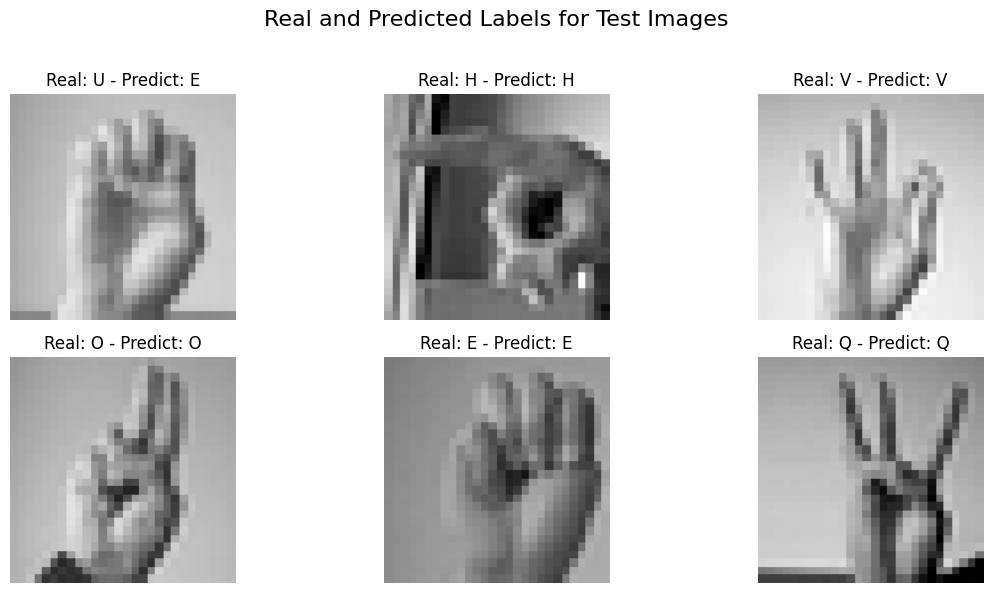

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mapping for num to letters
label_map = [chr(i) for i in range(65, 91) if chr(i) not in ['J', 'Z']]  

img, label = next(test_data_generator)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Real and Predicted Labels for Test Images", fontsize=16)

for i in range(6):
    to_predict = np.expand_dims(img[i], axis=0)
    pred = model.predict(to_predict)
    
    lab_pred = np.argmax(pred)
    lab = np.argmax(label[i])
    real_label = label_map[lab]
    predicted_label = label_map[lab_pred]
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img[i])
    ax.set_title(f'Real: {real_label} - Predict: {predicted_label}')
    ax.axis('off')  # Hide axis

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()